In [1]:
import pandas as pd

def parse_qb(text):
    players = []
    for x in text.split():
        if '.' in x and '-' in x and '(' not in x:
            players.append(x)      
    try:
        return players[0].split('-')[1]
    except IndexError:
        pass
    
def parse_rec(text):
    players = []
    for x in text.split():
        if '.' in x and '-' in x and '(' not in x:
            players.append(x)      
    try:
        return players[1].split('-')[-1].rstrip('.')
    except IndexError:
        pass

def was_intercepted(text):
     for x in text.split():
        if "INTERCEPTED" in text:
            return 1
        else:
            return 0
        
def clean_data(df, desc):    
    cols = ['QB', 'OffenseTeam','Rec', "YardLine", 
            "Yards", "IsIncomplete", "Intercepted"]
    
    df['QB'] = df[desc].apply(parse_qb)
    df['Rec'] = df[desc].apply(parse_rec)
    df['Intercepted'] = df[desc].apply(was_intercepted)
    
    return df.loc[(df['Intercepted'] == 0)][cols]

df = pd.read_csv("data/pbp-2016.csv")

df = df.loc[(df['IsPass']==1) & (df['SeasonYear'] == 2016)]
df = clean_data(df, 'Description')
df = df.apply(pd.to_numeric, errors='ignore')

In [2]:
top_qbs = []
x = df.groupby(['OffenseTeam', 'QB'])['Yards'].sum().nlargest(33)
for line in x.index:
    top_qbs.append(line[1])
    
df2 = df[df['QB'].isin(top_qbs)]

In [12]:
df2.groupby('QB').sum()['Yards'].sort_values(ascending=False).index.tolist()

['M.RYAN',
 'D.BREES',
 'K.COUSINS',
 'A.RODGERS',
 'J.FLACCO',
 'P.RIVERS',
 'A.LUCK',
 'R.WILSON',
 'C.PALMER',
 'M.STAFFORD',
 'A.DALTON',
 'J.WINSTON',
 'E.MANNING',
 'B.BORTLES',
 'S.BRADFORD',
 'D.CARR',
 'C.WENTZ',
 'B.ROETHLISBERGER',
 'D.PRESCOTT',
 'C.NEWTON',
 'T.SIEMIAN',
 'A.SMITH',
 'M.MARIOTA',
 'T.BRADY',
 'T.TAYLOR',
 'R.TANNEHILL',
 'B.OSWEILER',
 'R.FITZPATRICK',
 'C.KAEPERNICK',
 'C.KEENUM',
 'M.BARKLEY',
 'B.HOYER',
 'C.KESSLER']

In [ ]:
df2['Yards'].astype(float).tolist()

## Plot data on a tiny football field

In [ ]:
df2['Rec'].tolist()

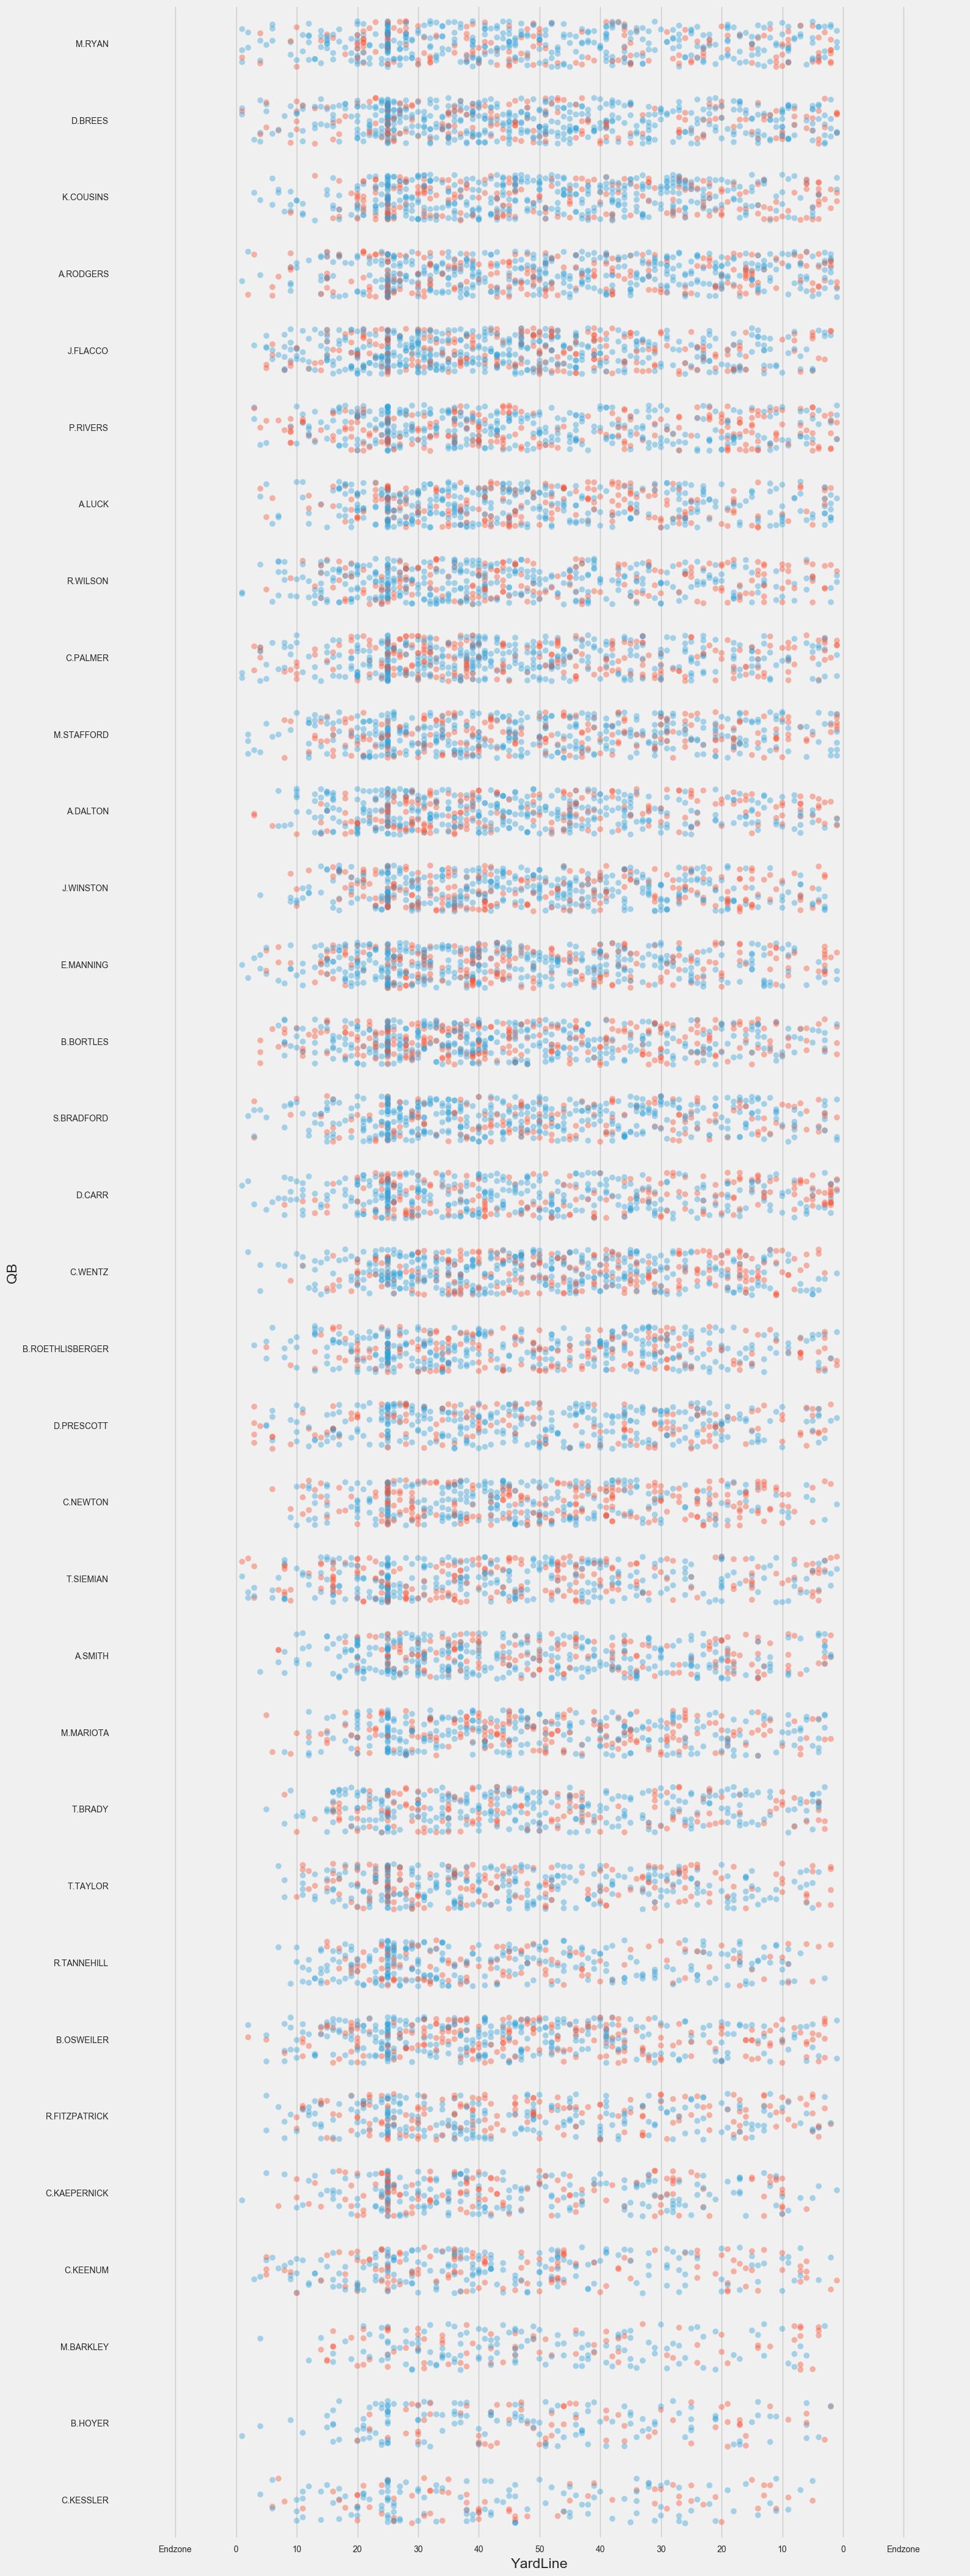

In [21]:
% matplotlib inline
import matplotlib.pyplot as plt
#import mpld3
import numpy as np
import seaborn as sns

plt.style.use("fivethirtyeight")

fig = plt.figure(figsize=(16, 50))

distance = df2['Yards'].astype(float).tolist()
labels = df2['Rec'].tolist()
yard_lines = ["Endzone", 0, 10, 20, 30, 40, 50, 40, 30, 20, 10, 0, "Endzone"]

top_qbs_sorted = df2.groupby('QB').sum()['Yards'].sort_values(ascending=False).index.tolist()

ax = sns.stripplot(x="YardLine", 
                   y="QB",             
                   data=df2, 
                   order=top_qbs_sorted, 
                   hue='IsIncomplete',
                   jitter=0.3, 
                   alpha=0.4, 
                   size=7)

plt.xticks(np.arange(-10, 111, 10), yard_lines)
ax.legend_.remove()

plt.savefig('passes.png')
plt.show()


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

fig = plt.figure(figsize=(14,16))

colors = ['crimson', 'steelblue']

x = df['YardLine']
y = df['Yards']

plt.scatter(x, y, marker='o', c=df['Complete'], alpha=0.3, cmap="bwr_r");

In [ ]:
plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)
mpld3.enable_notebook()
mpld3.display()

In [ ]:
import matplotlib.pyplot as plt
import mpld3
import seaborn as sns

fig = plt.figure(figsize=(16, 12))

x = df['YardLine']
y = df['Yards']

scatter = plt.scatter(x, y, marker="s", c=df['Complete'], s=12, alpha=0.3, cmap="bwr_r")
heatmap = sns.heatmap(df[["YardLine", "Yards"]])

plt.grid(color='white', linestyle='solid')
plt.title("2016 NFL Pass Data", size=20)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel("Yard Line (Line of Scrimmage)", size=16)
plt.ylabel("Yards of Play", size=16)

labels = df['Description'].tolist()
tooltip = mpld3.plugins.PointHTMLTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()